In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('Cleaned_Agerian_Forest_Fires.csv')

In [4]:
df = data.copy()

In [5]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,0
1,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,0
2,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,0
3,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,0
4,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,0


In [6]:
df.shape

(121, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          121 non-null    int64  
 1   month        121 non-null    int64  
 2   year         121 non-null    int64  
 3   Temperature  121 non-null    int64  
 4   RH           121 non-null    int64  
 5   Ws           121 non-null    int64  
 6   Rain         121 non-null    float64
 7   FFMC         121 non-null    float64
 8   DMC          121 non-null    float64
 9   DC           121 non-null    float64
 10  ISI          121 non-null    float64
 11  BUI          121 non-null    float64
 12  FWI          121 non-null    float64
 13  Classes      121 non-null    object 
 14  Region       121 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 14.3+ KB


In [8]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [11]:
#drop day,month,and year as they are not useful for the prediction

df = df.drop(['day','month','year'], axis = 1)

In [12]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,0
1,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,0
2,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,0
3,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,0
4,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,0


In [13]:
#checking the classes column
df.Classes.value_counts()

Classes
fire             78
not fire         41
not fire          1
not fire          1
Name: count, dtype: int64

In [15]:
#Encoding the Classes column
df['Classes']= np.where(df['Classes'].str.contains('not fire'),0,1)

In [16]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,0,0
1,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,0,0
2,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,0,0
3,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,0,0
4,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,0,0


In [17]:
df.Classes.value_counts()

Classes
1    78
0    43
Name: count, dtype: int64

In [63]:
#independent and dependent Features
X = df.drop('FWI', axis=1)
Y = df['FWI']

In [64]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0,0
1,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0,0
2,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0,0
3,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,0,0
4,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0,0


In [65]:
Y.head()

0    0.2
1    0.2
2    0.1
3    1.0
4    0.9
Name: FWI, dtype: float64

In [67]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state = 42)

In [68]:
X_train.shape,X_test.shape

((90, 11), (31, 11))

In [69]:
Y_train.shape,Y_test.shape

((90,), (31,))

######  Feature slection base on correlation

In [70]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.516221,-0.148683,-0.135914,0.587525,0.404227,0.331249,0.529565,0.391978,0.519822,-0.065281
RH,-0.516221,1.000000,0.014511,0.195940,-0.673630,-0.369996,-0.274098,-0.701824,-0.356503,-0.466919,-0.016045
Ws,-0.148683,0.014511,1.000000,-0.139414,0.098500,0.089629,0.069449,0.199996,0.087771,0.099408,-0.171863
Rain,-0.135914,0.195940,-0.139414,1.000000,-0.532790,-0.344343,-0.349494,-0.419341,-0.354044,-0.463739,-0.133403
FFMC,0.587525,-0.673630,0.098500,-0.532790,1.000000,0.570826,0.491637,0.767946,0.570128,0.800153,0.075604
DMC,0.404227,-0.369996,0.089629,-0.344343,0.570826,1.000000,0.919766,0.652202,0.992267,0.532455,0.232687
DC,0.331249,-0.274098,0.069449,-0.349494,0.491637,0.919766,1.000000,0.511397,0.941726,0.483847,0.397274
ISI,0.529565,-0.701824,0.199996,-0.419341,0.767946,0.652202,0.511397,1.000000,0.640169,0.704340,0.128340
BUI,0.391978,-0.356503,0.087771,-0.354044,0.570128,0.992267,0.941726,0.640169,1.000000,0.551610,0.277303
Classes,0.519822,-0.466919,0.099408,-0.463739,0.800153,0.532455,0.483847,0.704340,0.551610,1.000000,0.139272


###### Checking for multicollinearity

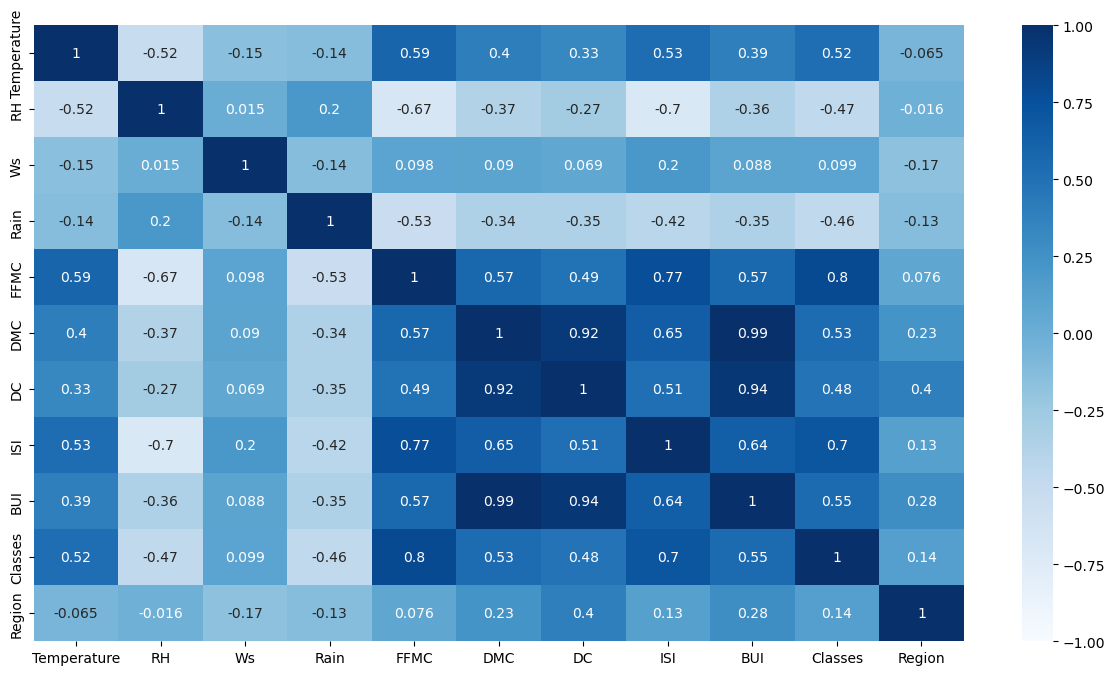

In [71]:
plt.figure(figsize=(15,8))
cor_matrix=X_train.corr()
sns.heatmap(cor_matrix, annot = True, vmax = 1, vmin=-1, cmap='Blues')
plt.show()

######  Creating threshold

In [72]:
def correlation (df,threshold):
    col_corr=set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [73]:
#setting the threshold
corr_features = correlation(X_train,0.85)

In [74]:
corr_features

{'BUI', 'DC'}

In [76]:
#dropping the corr_features from x_train and x_test

X_train.drop(corr_features, axis = 1, inplace = True)
X_test.drop(corr_features, axis = 1, inplace = True)

In [77]:
X_train.shape,X_test.shape

((90, 9), (31, 9))

###### Feature Scaling Or Standardization

In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
scaler = StandardScaler()

In [80]:
x_train_scaled = scaler.fit_transform(X_train)

In [81]:
x_test_scaled = scaler.transform(X_test)

In [82]:
x_train_scaled

array([[ 0.50670746,  0.74034875,  0.0882538 , -0.4015985 ,  0.14296971,
         1.05763421, -0.51578083,  0.74278135,  1.        ],
       [-0.05284679,  0.25900746,  0.50629812,  0.03612997, -0.55723404,
        -0.74178317, -0.88627129, -1.3462912 , -1.        ],
       [-0.61240104,  0.46529658,  0.0882538 , -0.46413113,  0.19239585,
        -0.82580266, -0.40681305,  0.74278135,  1.        ],
       [-0.05284679,  0.12148137,  0.50629812, -0.46413113,  0.53837888,
        -0.13264188,  0.22520008,  0.74278135, -1.        ],
       [ 0.50670746, -1.46006859,  0.92434244, -0.46413113,  0.92555037,
         0.42048642,  1.77254259,  0.74278135,  1.        ],
       [-1.45173241,  0.19024442,  1.34238676,  0.9115869 , -1.42219162,
        -1.00784488, -0.97344552, -1.3462912 , -1.        ],
       [ 1.62581595,  0.60282267, -2.42001211,  0.28626052, -0.59018481,
        -0.41270684, -0.99523908, -1.3462912 , -1.        ],
       [-2.5708409 , -0.08480775,  1.34238676, -0.4015985 , -0

In [83]:
x_test_scaled

array([[-0.61240104,  1.90932047,  0.92434244, -0.46413113,  0.29124815,
         0.12641821, -0.21067105,  0.74278135, -1.        ],
       [ 0.22693033,  0.19024442,  0.50629812, -0.46413113,  0.58780503,
         0.71455463,  0.35596142,  0.74278135, -1.        ],
       [-0.33262391,  0.3277705 , -0.32979052, -0.33906586, -0.318341  ,
        -0.81179941, -0.84268418, -1.3462912 , -1.        ],
       [-1.17195528,  2.18437264,  1.34238676, -0.46413113, -0.07944796,
        -0.40570522, -0.62474862, -1.3462912 , -1.        ],
       [ 0.78648458, -0.01604471,  0.0882538 , -0.46413113,  0.67018194,
         0.23144257,  0.50851632,  0.74278135, -1.        ],
       [ 0.22693033, -0.90996426,  0.92434244, -0.4015985 ,  0.60428041,
         0.42048642,  2.90580752,  0.74278135,  1.        ],
       [ 1.0662617 , -1.04749034, -0.74783484, -0.46413113,  0.9008373 ,
         0.32946531,  1.1187359 ,  0.74278135,  1.        ],
       [-0.61240104, -0.90996426,  2.59651971, -0.46413113,  0

###### Boxplot to understand the effect of standardscaler

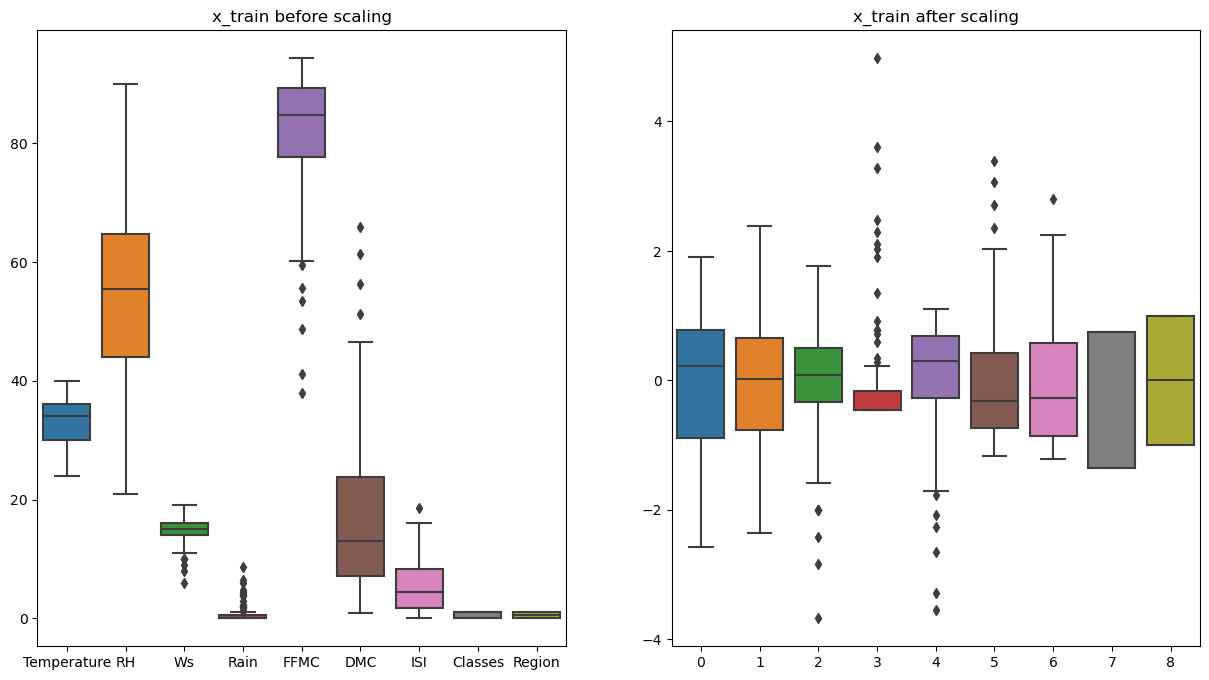

In [84]:
plt.subplots(figsize = (15,8))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("x_train before scaling")
plt.subplot(1,2,2)
sns.boxplot(data=x_train_scaled)
plt.title('x_train after scaling')
plt.show()

###### Linear regression Model


In [51]:
from sklearn.linear_model import LinearRegression

In [53]:
from sklearn.metrics import mean_absolute_error, r2_score

In [101]:
linreg = LinearRegression()
linreg.fit(x_train_scaled,Y_train)
y_pred = linreg.predict(x_test_scaled)
mae = mean_absolute_error(Y_test,y_pred)
score = r2_score(Y_test,y_pred)

MAE: 2.6497014311876765

R2 score: 0.275269719018447
 


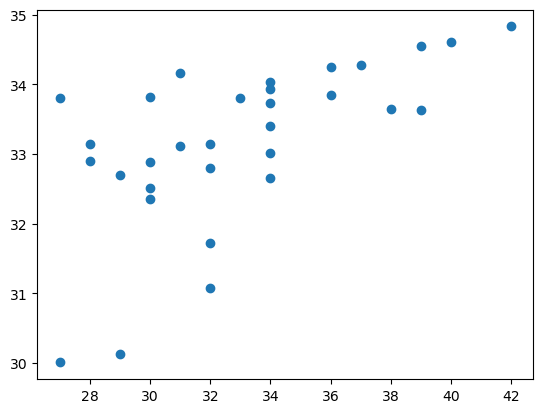

In [86]:
print("MAE:",mae)
print("")
print("R2 score:", score)
print(' ')
plt.scatter(y_test,y_pred)

###### Lasso Regression

MAE: 1.3533284341900453

R2 score: 0.8856973898032947
 


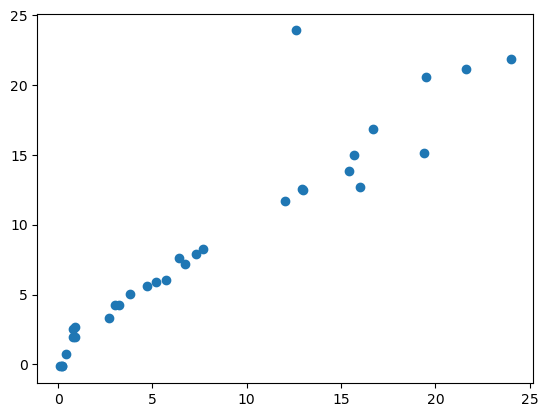

In [90]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(x_train_scaled,Y_train)
y_pred = lasso.predict(x_test_scaled)
mae = mean_absolute_error(Y_test,y_pred)
score = r2_score(Y_test,y_pred)
print("MAE:",mae)
print("")
print("R2 score:", score)
print(' ')
plt.scatter(Y_test,y_pred)

######  Cross Validation lasso

MAE: 1.193041681569449

R2 score: 0.8459273908772933
 


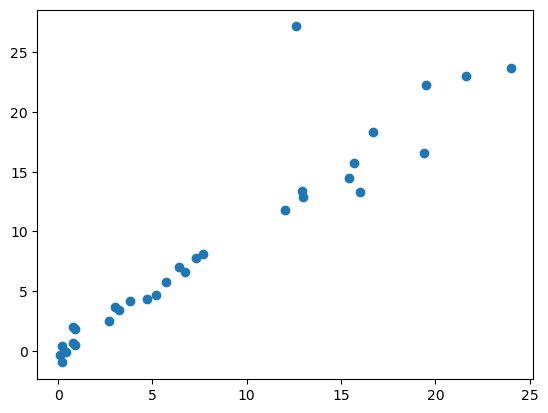

In [96]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV()
lassocv.fit(x_train_scaled,Y_train)
y_pred = lassocv.predict(x_test_scaled)
mae = mean_absolute_error(Y_test,y_pred)
score = r2_score(Y_test,y_pred)
print("MAE:",mae)
print("")
print("R2 score:", score)
print(' ')
plt.scatter(Y_test,y_pred)

MAE: 1.1751747182578056

R2 score: 0.852528300759219
 


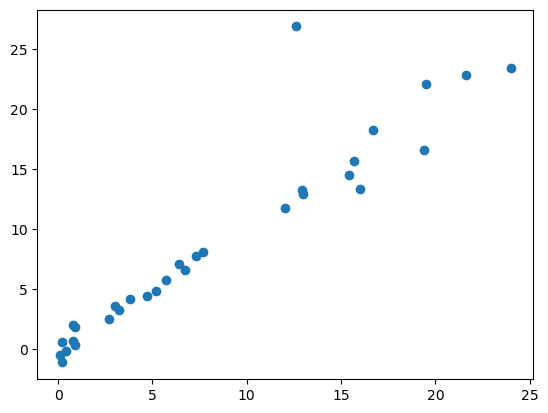

In [95]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train_scaled,Y_train)
y_pred = ridge.predict(x_test_scaled)
mae = mean_absolute_error(Y_test,y_pred)
score = r2_score(Y_test,y_pred)
print("MAE:",mae)
print("")
print("R2 score:", score)
print(' ')
plt.scatter(Y_test,y_pred)

MAE: 1.203254860778715

R2 score: 0.8441650560653676
 


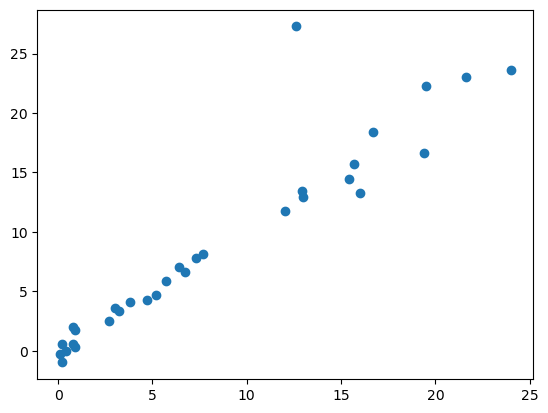

In [97]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV()
ridgecv.fit(x_train_scaled,Y_train)
y_pred = ridgecv.predict(x_test_scaled)
mae = mean_absolute_error(Y_test,y_pred)
score = r2_score(Y_test,y_pred)
print("MAE:",mae)
print("")
print("R2 score:", score)
print(' ')
plt.scatter(Y_test,y_pred)

MAE: 1.8906267412093642

R2 score: 0.8881524660842127
 


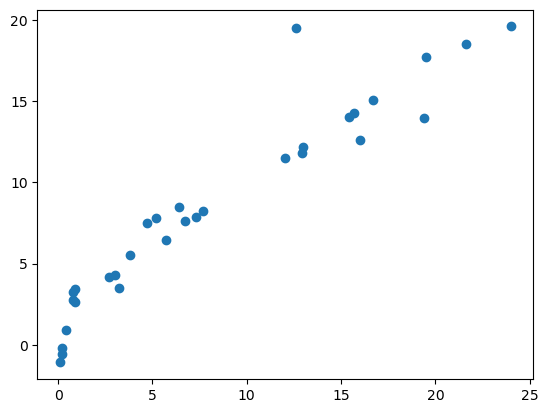

In [98]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
elastic.fit(x_train_scaled,Y_train)
y_pred = elastic.predict(x_test_scaled)
mae = mean_absolute_error(Y_test,y_pred)
score = r2_score(Y_test,y_pred)
print("MAE:",mae)
print("")
print("R2 score:", score)
print(' ')
plt.scatter(Y_test,y_pred)

###### Pickle the ML model and the standardscaler

In [100]:
scaler

StandardScaler()

In [102]:
lasso

Lasso()

In [103]:
import pickle
pickle.dump(scaler,open('scaler.pk1','wb'))
pickle.dump(lasso,open('lasso.pk1','wb'))